<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

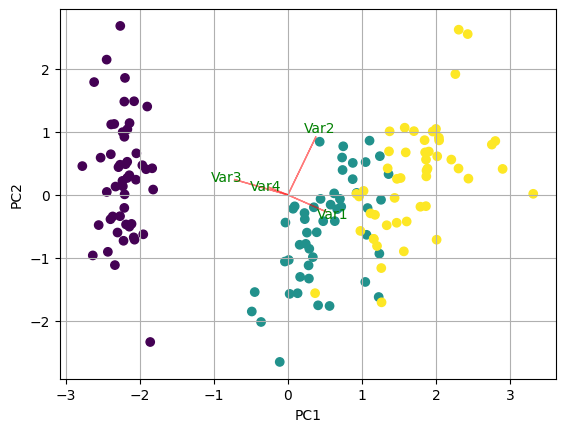

In [ ]:
# 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target

#In general it is a good idea to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function.
myplot(x_new[:,0:2], pca.components_)
plt.show()

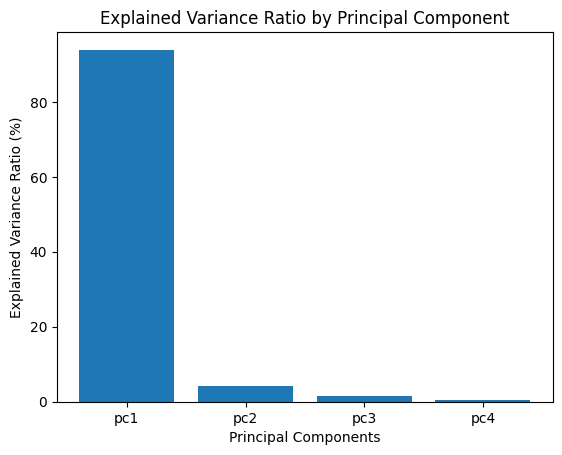

SVM: 0.9466666666666667
Naive Bayes: 0.88
LDA: 0.96
QDA: 0.96
Decision Tree: 0.92
Random Forest: 0.9466666666666667
Nearest Neighbors: 0.96
Neural Networks: 0.9333333333333333


,score
0,0.946667
1,0.880000
2,0.960000
3,0.960000
4,0.920000
5,0.946667
6,0.960000
7,0.933333


In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load Iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fit and transform data using PCA
pca = PCA(n_components = 4)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot explained variance ratio
pe = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['pc' + str(x) for x in range(1, len(pe) + 1)]
plt.bar(x=range(1, len(pe) + 1), height=pe, tick_label=labels)
plt.ylabel('Explained Variance Ratio (%)')
plt.xlabel('Principal Components')
plt.title("Explained Variance Ratio by Principal Component")
plt.show()

# Define classifiers
names = ["SVM", "Naive Bayes", "LDA", "QDA", "Decision Tree", "Random Forest", "Nearest Neighbors", "Neural Networks"]
classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

# Perform classification and display scores
s = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    s.append(score)
    print(name + ": " + str(score))

# Display scores in a DataFrame
classify = pd.DataFrame(data=s, columns=['score'])
classify.head(8)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

# 10 samples with 5 features
train_features = np.random.rand(10,5)

model = PCA(n_components=2).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['a','b','c','d','e']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())


print(df)

     0  1
0  PC0  e
1  PC1  d


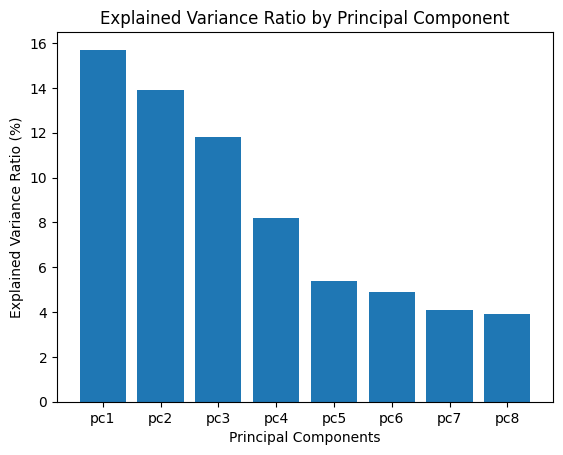

SVM: 0.9599555061179088
Naive Bayes: 0.8698553948832035
LDA: 0.8776418242491657
QDA: 0.9399332591768632
Decision Tree: 0.8331479421579533
Random Forest: 0.932146829810901
Nearest Neighbors: 0.9577308120133482
Neural Networks: 0.9477196885428254


,score
0,0.959956
1,0.869855
2,0.877642
3,0.939933
4,0.833148
5,0.932147
6,0.957731
7,0.947720


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load Iris dataset
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fit and transform data using PCA
pca = PCA(n_components = 8)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot explained variance ratio
pe = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['pc' + str(x) for x in range(1, len(pe) + 1)]
plt.bar(x=range(1, len(pe) + 1), height=pe, tick_label=labels)
plt.ylabel('Explained Variance Ratio (%)')
plt.xlabel('Principal Components')
plt.title("Explained Variance Ratio by Principal Component")
plt.show()

# Define classifiers
names = ["SVM", "Naive Bayes", "LDA", "QDA", "Decision Tree", "Random Forest", "Nearest Neighbors", "Neural Networks"]
classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

# Perform classification and display scores
s = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    s.append(score)
    print(name + ": " + str(score))

# Display scores in a DataFrame
classify = pd.DataFrame(data=s, columns=['score'])
classify.head(8)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


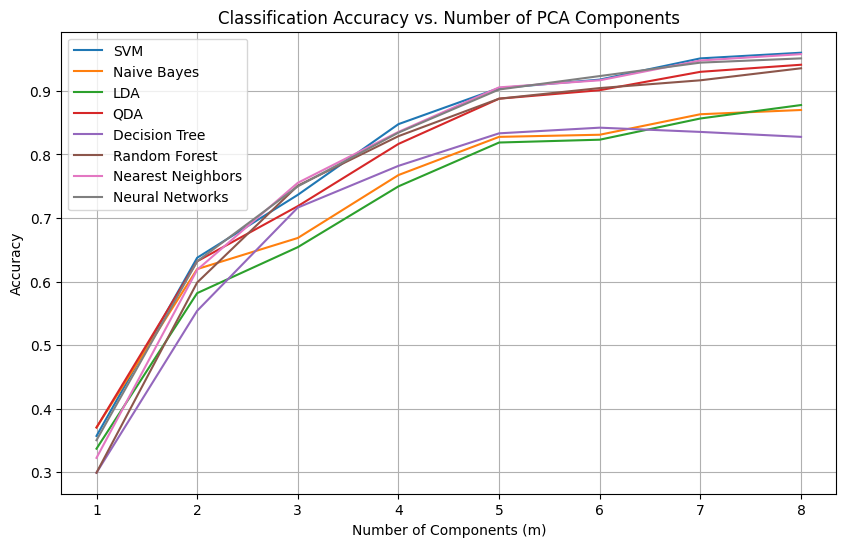

In [31]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Digits dataset
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Original Data: Define classifiers and calculate accuracy
original_classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

original_scores = {}
for name, clf in zip(names, original_classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    original_scores[name] = score

# Save original scores to a DataFrame
original_classify = pd.DataFrame(data=original_scores.items(), columns=['Classifier', 'Original Score'])

# Define classifiers for PCA-based classification
pca_classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

# Perform classification with PCA for different values of m
pca_results = {}
components_range = range(1, 9)  # Adjust the range as needed

for m in components_range:
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    pca_scores = {}
    for name, clf in zip(names, pca_classifiers):
        clf.fit(X_train_pca, y_train)
        score = clf.score(X_test_pca, y_test)
        pca_scores[name] = score

    pca_results[m] = pca_scores

# Save PCA results to a DataFrame
pca_classify = pd.DataFrame({f'PCA-{m} Components': scores for m, scores in pca_results.items()})

# Display original and PCA scores in a DataFrame
combined_classify = pd.concat([original_classify, pca_classify], axis=1)

# Save the combined results to a CSV file
combined_classify.to_csv('classification_results_combined.csv', index=False)

# Plot the results for better analysis
plt.figure(figsize=(10, 6))
for classifier in names:
    plt.plot(components_range, [pca_results[m][classifier] for m in components_range], label=classifier)

plt.xlabel('Number of Components (m)')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy vs. Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()
